<a href="https://colab.research.google.com/github/akshit2801/DLNLP/blob/main/simpleNN_singleNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 2nd June, 2023
# Ref: https://www.kaggle.com/code/ryanholbrook/a-single-neuron

In [ ]:
# 1.0 Call libraries
import pandas as pd
import numpy as np
from  pathlib import Path

# 1.0.1
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# 1.1 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# 2.0
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# 2.1 Where is our data file:
pathToFolder = "/gdrive/MyDrive/Colab_data_files/deeplearning"

In [ ]:
# 2.2 Full file path:
path = Path(pathToFolder) / "red_wine.csv"

In [ ]:
# 3.0 Read data
red_wine = pd.read_csv(path)
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# 3.1
red_wine.shape   # (1599, 12)
red_wine.dtypes

(1599, 12)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
# 3.2 Get target and predictors:
y = red_wine.pop("quality")
X = red_wine

In [ ]:
# 4.0 Build model:

model = tf.keras.Sequential()

In [ ]:
# 4.1
model.add(layers.Input( shape = (11,) ) )

In [ ]:
X.shape

(1599, 11)

In [ ]:
# Hidden layer 1
model.add(layers.Dense(11,activation='relu'))

In [ ]:
# Hidden layer 2
model.add(layers.Dense(770,activation='relu'))

In [ ]:
# 4.2 Output layer
model.add(layers.Dense(1))

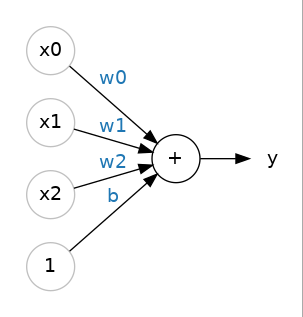

In [ ]:
#4.3 Compile
model.compile( loss = "mae")
# mae = mean absolute error

In [ ]:
# 4.4 Train
model.fit(X,y, epochs = 1000 )

Epoch 1/1000
50/50 [==============================] - 1s 2ms/step - loss: 1.9437
Epoch 2/1000
50/50 [==============================] - 0s 2ms/step - loss: 1.4655
Epoch 3/1000
50/50 [==============================] - 0s 2ms/step - loss: 1.2573
Epoch 4/1000
50/50 [==============================] - 0s 2ms/step - loss: 1.2302
Epoch 5/1000
50/50 [==============================] - 0s 2ms/step - loss: 1.1319
Epoch 6/1000
50/50 [==============================] - 0s 2ms/step - loss: 1.0723
Epoch 7/1000
50/50 [==============================] - 0s 2ms/step - loss: 1.0051
Epoch 8/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.9638
Epoch 9/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.8745
Epoch 10/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.8483
Epoch 11/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.8877
Epoch 12/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.8168
Epoch 13/1000
50/50 [====

In [ ]:
# 5.0 Predict
pred = model.predict(X)

50/50 [==============================] - 0s 3ms/step


In [ ]:
# 5.1 Round up decimal places
pred = np.round(pred)


In [ ]:
# 5.1.1
y.shape

(1599,)

In [ ]:
# 5.2 Compare:
np.sum(pred == y.values.reshape(1599,1))/1599

0.6479049405878674

In [ ]:
######### --------Done ---------------